In [3]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=6*np.random.rand(100, 1) -3
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)

Text(0, 0.5, 'X dataset')

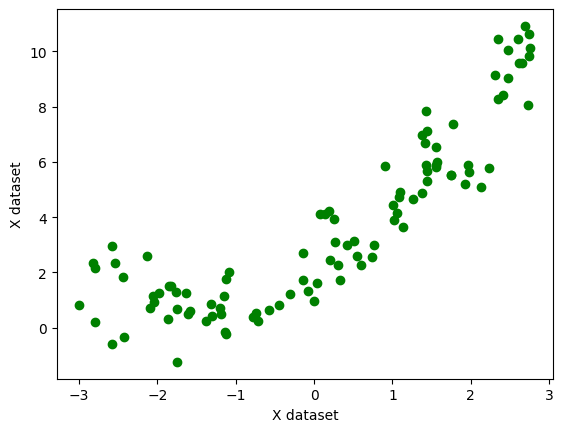

In [4]:
plt.scatter(x,y,color="green")
plt.xlabel("X dataset")
plt.ylabel("X dataset")

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
## lets implement simple linear regression


In [10]:
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [11]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(x_test))
print(score)

0.7091859823624922


Text(0, 0.5, 'Y')

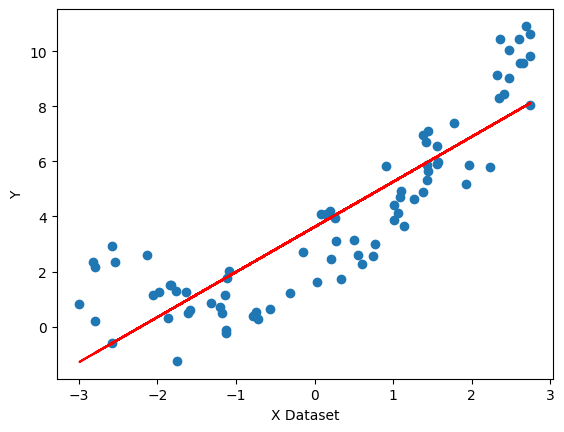

In [18]:
## Lets visualize this model
plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [19]:
##Lets apply polynomail transformation
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [28]:
x_train_poly

array([[ 1.00000000e+00, -2.57750744e+00,  6.64354462e+00],
       [ 1.00000000e+00, -1.98295487e+00,  3.93211003e+00],
       [ 1.00000000e+00, -1.11854676e+00,  1.25114686e+00],
       [ 1.00000000e+00,  1.26856567e+00,  1.60925887e+00],
       [ 1.00000000e+00, -7.19452900e-01,  5.17612475e-01],
       [ 1.00000000e+00,  1.55260547e+00,  2.41058374e+00],
       [ 1.00000000e+00, -1.31513257e+00,  1.72957367e+00],
       [ 1.00000000e+00,  1.44690461e+00,  2.09353295e+00],
       [ 1.00000000e+00,  3.42424702e-02,  1.17254676e-03],
       [ 1.00000000e+00, -1.20126817e+00,  1.44304522e+00],
       [ 1.00000000e+00,  1.44491716e+00,  2.08778561e+00],
       [ 1.00000000e+00,  1.94868549e-01,  3.79737513e-02],
       [ 1.00000000e+00,  2.23047011e+00,  4.97499692e+00],
       [ 1.00000000e+00,  2.61712067e+00,  6.84932058e+00],
       [ 1.00000000e+00,  1.56563377e+00,  2.45120910e+00],
       [ 1.00000000e+00, -1.86219798e+00,  3.46778131e+00],
       [ 1.00000000e+00,  1.09335860e+00

In [33]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_polly, y_train)
y_pred = regression.predict(x_test_polly)
score=r2_score(y_test,y_pred)
print(score)

0.8514350155266659


In [37]:
print(regression.coef_)

[[0.         1.60693321 0.47300522]]


In [38]:
print(regression.intercept_)

[2.23574409]


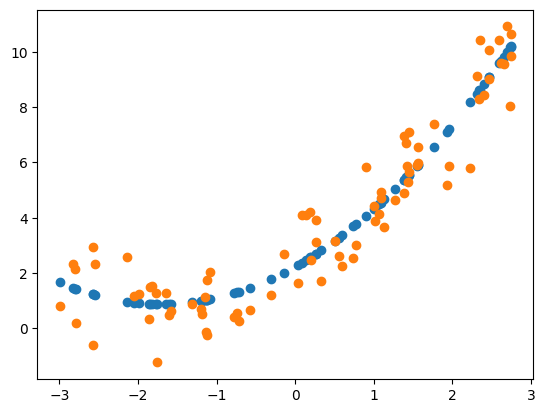

In [39]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [40]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(x_train)
X_test_poly=poly.transform(x_test)

In [41]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8524368895258614


In [43]:
#3 Prediction of new data set
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

## Pipeline Concepts 

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([("poly_features",poly_features),("lin_reg",lin_reg)])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(x_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    


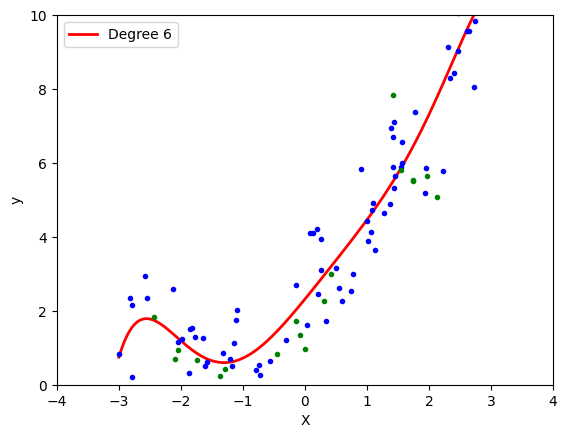

In [60]:
poly_regression(6)